In [2]:
import numpy as np
import pandas as pd
import Strategies 
import Strategy_Analysis_Tool 
from binance.client import Client
from matplotlib import pyplot as plt


In [3]:
# Get data
symbol = "BTCUSDT"
timeFrame = "1h"
startDate = "2017-01-01"
endDate = "2022-08-28"
client = Client()
bars = client.get_historical_klines(symbol=symbol,interval=timeFrame,start_str=startDate, end_str = endDate)
df = pd.DataFrame(bars[:],columns=["timestamp","open","high","low","close","volume", "close_time", "quote_asset_volume", "number_of_trade", "TBB", "TBQ", "ignore"])
df["date"]=pd.to_datetime(df["timestamp"],unit="ms").astype(str)
df = df.drop(["timestamp", "close_time", "quote_asset_volume", "number_of_trade", "TBB", "TBQ", "ignore"], axis=1)
df["open"] = pd.to_numeric(df["open"])
df["high"] = pd.to_numeric(df["high"])
df["low"] = pd.to_numeric(df["low"])
df["close"] = pd.to_numeric(df["close"])
df["volume"] = pd.to_numeric(df["volume"])
df

,open,high,low,close,volume,date
0,4261.48,4313.62,4261.32,4308.83,47.181009,2017-08-17 04:00:00
1,4308.83,4328.69,4291.37,4315.32,23.234916,2017-08-17 05:00:00
2,4330.29,4345.45,4309.37,4324.35,7.229691,2017-08-17 06:00:00
3,4316.62,4349.99,4287.41,4349.99,4.443249,2017-08-17 07:00:00
4,4333.32,4377.85,4333.32,4360.69,0.972807,2017-08-17 08:00:00
...,...,...,...,...,...,...
43953,20018.00,20040.40,19941.83,20007.99,4374.049180,2022-08-27 20:00:00
43954,20007.99,20029.84,19870.01,19873.06,2779.324280,2022-08-27 21:00:00
43955,19874.25,20103.57,19858.43,20020.08,8501.926530,2022-08-27 22:00:00
43956,20021.35,20087.65,19992.55,20037.60,5025.547650,2022-08-27 23:00:00


In [4]:
# Buy and hold
buy_and_hold_parameters = {
    "name":"buy and hold",                            ## str
    "start_money" : 1000.0,                           ## float    
    "start_storage" : 0.0,                            ## float
    "trading_fee_rate" : 0.002,                       ## float
    "unit" : 0.0001,                                  ## float
}
buy_and_hodl = Strategies.Buy_and_Hold(buy_and_hold_parameters)

In [5]:
sharpe_ratio, expected_return = Strategy_Analysis_Tool.Analysis_tool.Shape_Ratio(buy_and_hodl, df, 0.02, window_size=10000, window_off=1000)
print("*--------------------------------*")
print("strategy:", buy_and_hodl.name)
print("expected return:", expected_return * 100)
print("sharpe ratio:", sharpe_ratio)

*--------------------------------*
strategy: buy and hold
expected return: 121.7750752080959
sharpe ratio: 0.6863524542570872


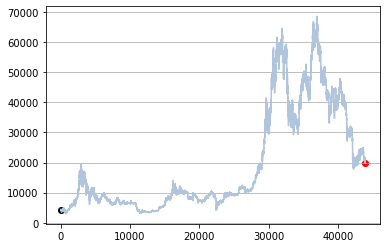

*--------------------------------*
strategy: buy and hold
trading count: 2
profit: 369.1365441114355
MDD: 0.957469866475196


In [6]:
profit, trading_count, buy_record, sell_record, MDD = buy_and_hodl.back_test(df)
print("*--------------------------------*")
print("strategy:", buy_and_hodl.name)
print("trading count:", trading_count)
print("profit:", profit * 100)
print("MDD:", MDD)